In [214]:
import pandas as pd

In [215]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [216]:
#Combined products_cl.csv and brands_cl.csv
pro_b = pd.read_csv("/Users/simgesargin/Desktop/Bootcamp/Eniac/pro_b.csv")

#Discounts related df from products_cl and orderlines_qu 

ol_price = pd.read_csv("/Users/simgesargin/Desktop/Bootcamp/Eniac/ol_price.csv")

#Quality assessed orders to access total paid

orders_qu = pd.read_csv("/Users/simgesargin/Desktop/Bootcamp/Eniac/orders_qu.csv")

In [217]:
pro_b.head()

,sku,name,desc,price,in_stock,type,brand_abb,brand_name
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,RAI,Rain Design
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,APP,Apple
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,APP,Apple
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,APP,Apple
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,KIN,Kingston


In [218]:
ol_price.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,price,discount
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,60.99,13.50
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,22.95,3.96
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,89.00,16.81
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,76.99,16.09
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,299.99,157.50


In [219]:
orders_qu.head()

,order_id,created_date,total_paid,state
0,241423,2017-11-06 13:10:02,136.15,Completed
1,242832,2017-12-31 17:40:03,15.76,Completed
2,243330,2017-02-16 10:59:38,84.98,Completed
3,245275,2017-06-28 11:35:37,149.00,Completed
4,245595,2017-01-21 12:52:47,112.97,Completed


In [220]:
#How many products are being discounted?

In [221]:
#Create a copy of existing dataframe
product_c = ol_price.copy()

In [222]:
#Take the percentage 
product_c["discount_percent"]= ((product_c.discount/product_c.price)*100).round(2)
product_c.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,price,discount,discount_percent
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,60.99,13.50,22.13
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,22.95,3.96,17.25
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,89.00,16.81,18.89
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,76.99,16.09,20.90
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,299.99,157.50,52.50


In [223]:
#Control the info
product_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                53231 non-null  int64  
 1   id_order          53231 non-null  int64  
 2   product_id        53231 non-null  int64  
 3   product_quantity  53231 non-null  int64  
 4   sku               53231 non-null  object 
 5   unit_price        53231 non-null  float64
 6   date              53231 non-null  object 
 7   price             53231 non-null  float64
 8   discount          53231 non-null  float64
 9   discount_percent  53231 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 4.1+ MB


In [224]:
#Change the datatype of date
product_c["date"] = pd.to_datetime(product_c["date"])
product_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
 7   price             53231 non-null  float64       
 8   discount          53231 non-null  float64       
 9   discount_percent  53231 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 4.1+ MB


In [225]:
#I wanted to get the counts of discounts more than 0.00.
discounted_products = product_c.loc[(product_c["discount"]!= 0.00),:]

In [226]:
#Entries of discount column
discounted_products = product_c.discount.value_counts()
discounted_products.info()

<class 'pandas.core.series.Series'>
Float64Index: 5668 entries, 0.0 to 31.760000000000005
Series name: discount
Non-Null Count  Dtype
--------------  -----
5668 non-null   int64
dtypes: int64(1)
memory usage: 88.6 KB


In [227]:
disproducts = product_c.copy()

In [228]:
#List of discounted products

disproducts_list = list(disproducts["discount"])

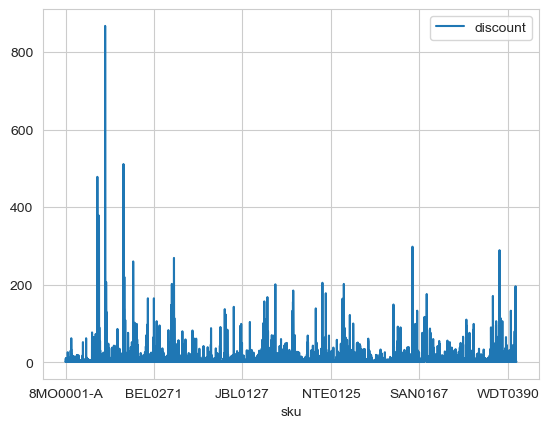

In [229]:
disproducts.groupby("sku").agg({"discount": "count" }).plot.line();

In [230]:
combined_df = disproducts.merge(pro_b, how='left')

In [231]:
combined_df.head(2)

,id,id_order,product_id,product_quantity,sku,unit_price,date,price,discount,discount_percent,name,desc,in_stock,type,brand_abb,brand_name
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,60.99,13.50,22.13,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,1,12755395,OWC,OWC
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,22.95,3.96,17.25,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,0,5720,IOT,iOttie


In [232]:
combined_df[["discount"]].max()

discount    1320.0
dtype: float64

<AxesSubplot:xlabel='date', ylabel='product_quantity'>

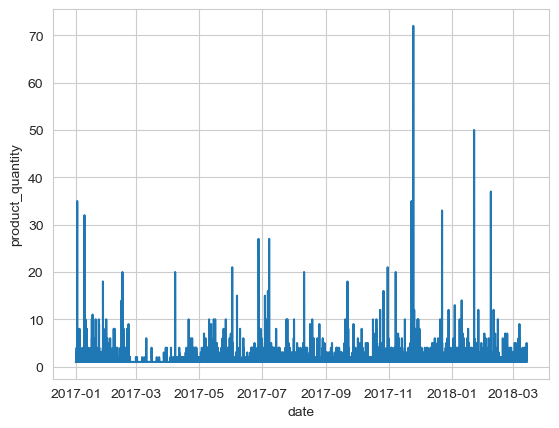

In [233]:
#How do seasonality and special dates (Christmas, Black Friday) affect sales?
sns.lineplot(x='date', y='product_quantity', data=combined_df)

In [234]:
import datetime

christmas_days = [datetime.datetime(2017, 12, 25), datetime.datetime(2018, 12, 25)]

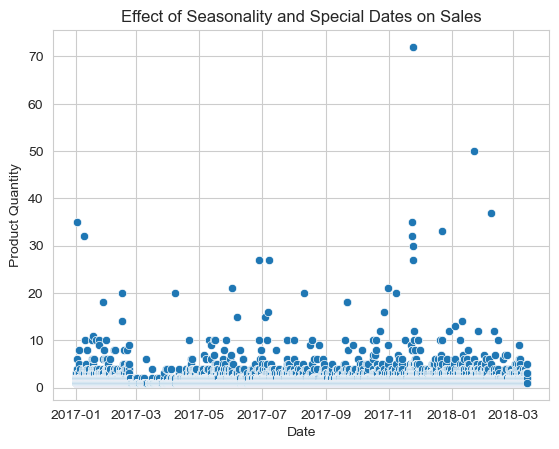

In [235]:
christmas_days = ['2017-12-25', '2018-12-25']
sns.scatterplot(x='date', y='product_quantity', data=combined_df)
for day in christmas_days:
    plt.scatter(x=combined_df.loc[combined_df['date'] == day, 'date'], 
                y=combined_df.loc[combined_df['date'] == day, 'product_quantity'],
                color='red', s=100, marker='*')
plt.xlabel('Date')
plt.ylabel('Product Quantity')
plt.title('Effect of Seasonality and Special Dates on Sales')
plt.show()

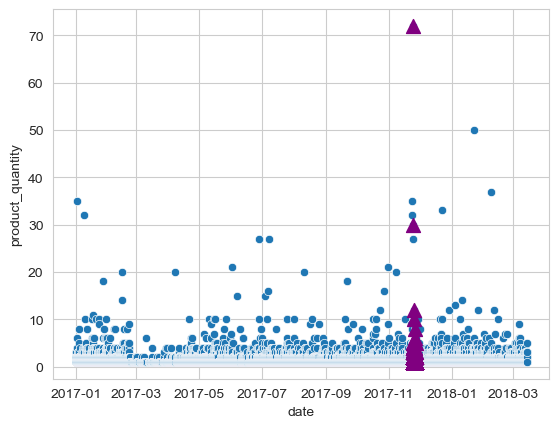

In [236]:
black_friday_2017 = combined_df.loc[(combined_df['date'] >= '2017-11-24') & 
                                     (combined_df['date'] <= '2017-11-27')]
sns.scatterplot(x='date', y='product_quantity', data=combined_df)
plt.scatter(x=black_friday_2017['date'], y=black_friday_2017['product_quantity'], 
            color='purple', s=100, marker='^')
#groupby year and month and then combine them in a single column
#Restrict the time frame with between and assign it a new variable and use it in your df 

In [237]:
order_qp = orders_qu.copy()

In [238]:
order_qp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      40985 non-null  int64  
 1   created_date  40985 non-null  object 
 2   total_paid    40985 non-null  float64
 3   state         40985 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB


In [239]:
order_qp["created_date"] = pd.to_datetime(order_qp["created_date"])
order_qp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      40985 non-null  int64         
 1   created_date  40985 non-null  datetime64[ns]
 2   total_paid    40985 non-null  float64       
 3   state         40985 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [240]:
order_qp.head(1)

,order_id,created_date,total_paid,state
0,241423,2017-11-06 13:10:02,136.15,Completed


In [241]:
product_c.head(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,price,discount,discount_percent
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,60.99,13.5,22.13


In [242]:
order_qp.rename(columns ={'order_id': 'id_order'}, inplace = True)

In [243]:
seasondf = order_qp.merge(product_c,how='left').loc[:,['id_order','created_date','discount','total_paid','unit_price','price']]

In [244]:
seasondf_m=seasondf.groupby(seasondf["created_date"].dt.month_name())["total_paid"].sum()

In [245]:
seasondf_m.head(1)

created_date
April    338744.21
Name: total_paid, dtype: float64

In [246]:
seasondf["month"] = seasondf["created_date"].dt.month
seasondf["day"] = seasondf["created_date"].dt.day
seasondf["weekday"] = seasondf["created_date"].dt.weekday
seasondf["day_of_week"] = seasondf["created_date"].dt.day_name()
seasondf["month_name"] = seasondf["created_date"].dt.month_name()
seasondf["year"] = seasondf["created_date"].dt.year
seasondf.head()

,id_order,created_date,discount,total_paid,unit_price,price,month,day,weekday,day_of_week,month_name,year
0,241423,2017-11-06 13:10:02,10.83,136.15,129.16,139.99,11,6,0,Monday,November,2017
1,242832,2017-12-31 17:40:03,7.22,15.76,10.77,17.99,12,31,6,Sunday,December,2017
2,243330,2017-02-16 10:59:38,22.00,84.98,77.99,99.99,2,16,3,Thursday,February,2017
3,245275,2017-06-28 11:35:37,30.00,149.00,149.00,179.00,6,28,2,Wednesday,June,2017
4,245595,2017-01-21 12:52:47,50.96,112.97,52.99,103.95,1,21,5,Saturday,January,2017


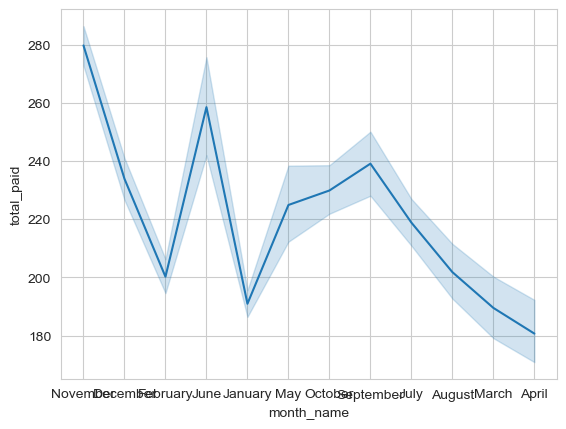

In [247]:
sns.lineplot(data=seasondf, 
            x="month_name", 
            y="total_paid",
            estimator ="mean",
            palette="spring");

<AxesSubplot:xlabel='month_name', ylabel='total_paid'>

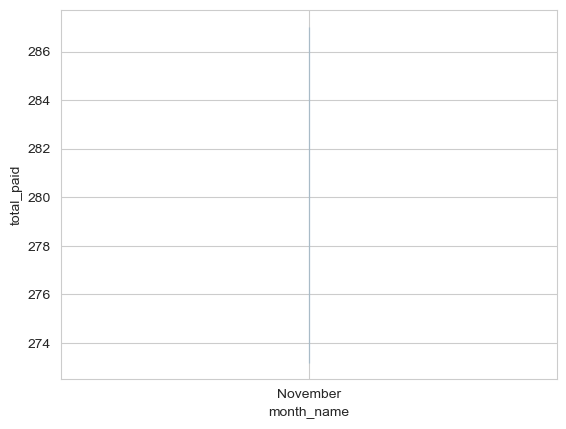

In [248]:
black_friday_2017 = seasondf.loc[(seasondf['month_name'] == 'November')]
sns.lineplot(x='month_name', y='total_paid', data=black_friday_2017)

In [249]:
#christmas_days = ['2017-12-01', '2017-12-25']
#sns.lineplot(x='created_date', y='id_order', data=seasondf)
#for day in christmas_days:
    #plt.scatter(x=seasondf.loc[seasondf['created_date'] == day, 'created_date'], 
                #y=seasondf.loc[seasondf['created_date'] == day, 'id_order'],
                #color='red', s=100, marker='*')

In [250]:
seasondf.head()

,id_order,created_date,discount,total_paid,unit_price,price,month,day,weekday,day_of_week,month_name,year
0,241423,2017-11-06 13:10:02,10.83,136.15,129.16,139.99,11,6,0,Monday,November,2017
1,242832,2017-12-31 17:40:03,7.22,15.76,10.77,17.99,12,31,6,Sunday,December,2017
2,243330,2017-02-16 10:59:38,22.00,84.98,77.99,99.99,2,16,3,Thursday,February,2017
3,245275,2017-06-28 11:35:37,30.00,149.00,149.00,179.00,6,28,2,Wednesday,June,2017
4,245595,2017-01-21 12:52:47,50.96,112.97,52.99,103.95,1,21,5,Saturday,January,2017


In [251]:
smalldf = seasondf.loc[seasondf["created_date"].between("2017-12-01", "2017-12-31")]


In [252]:
smalldf.head(1)

,id_order,created_date,discount,total_paid,unit_price,price,month,day,weekday,day_of_week,month_name,year
30,257280,2017-12-20 14:49:52,39.9,260.0,260.0,299.9,12,20,2,Wednesday,December,2017


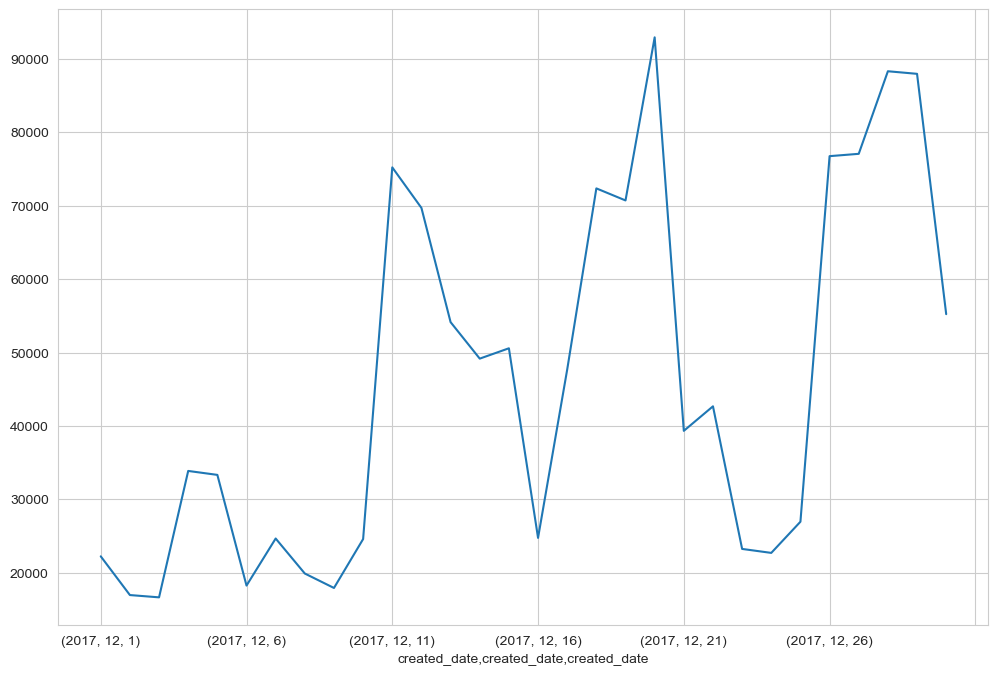

In [253]:
(
    smalldf
    .groupby([smalldf.created_date.dt.year, 
              smalldf.created_date.dt.month,
              smalldf.created_date.dt.day])["total_paid"]
    .sum()
    .plot(figsize=(12, 8))
 );

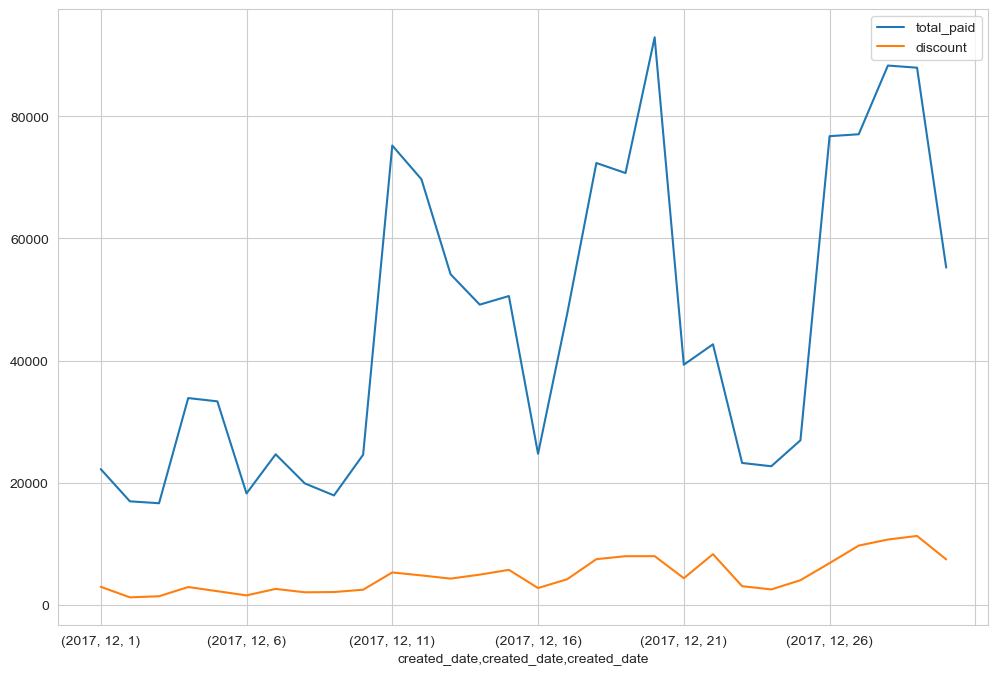

In [254]:
(
    smalldf
    .groupby([smalldf.created_date.dt.year, 
              smalldf.created_date.dt.month,
              smalldf.created_date.dt.day]).agg({"total_paid": "sum", "discount": "sum"})
    .plot(figsize=(12, 8))
 );

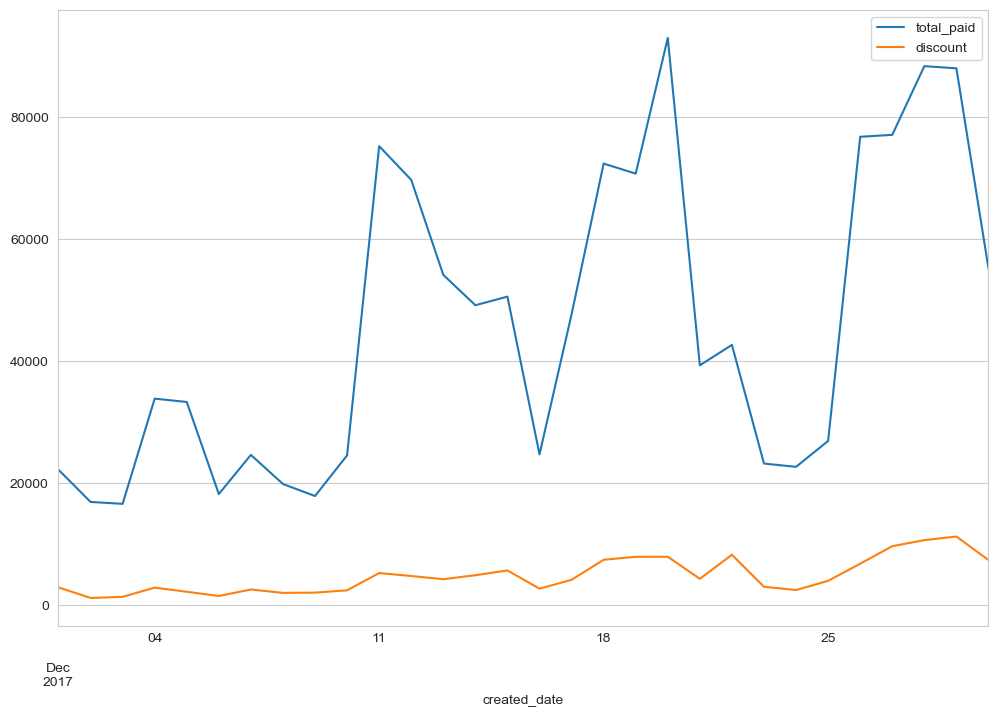

In [255]:
# the amount of total paid each day in december
#plot a daily graph for the amount of total paid
(
    smalldf
    .resample("D", on="created_date")
    .agg({"total_paid": "sum", "discount": "sum"})
    .plot(figsize=(12, 8))
 );

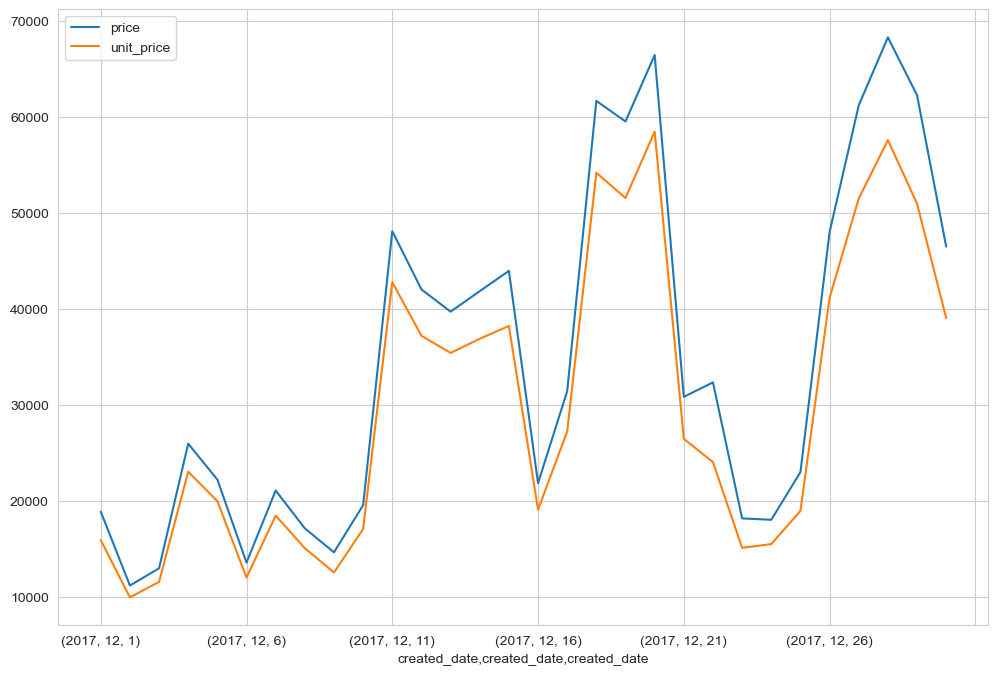

In [256]:
(
    smalldf
    .groupby([smalldf.created_date.dt.year, 
              smalldf.created_date.dt.month,
              smalldf.created_date.dt.day]).agg({"price": "sum", "unit_price": "sum"})
    .plot(figsize=(12, 8))
 );

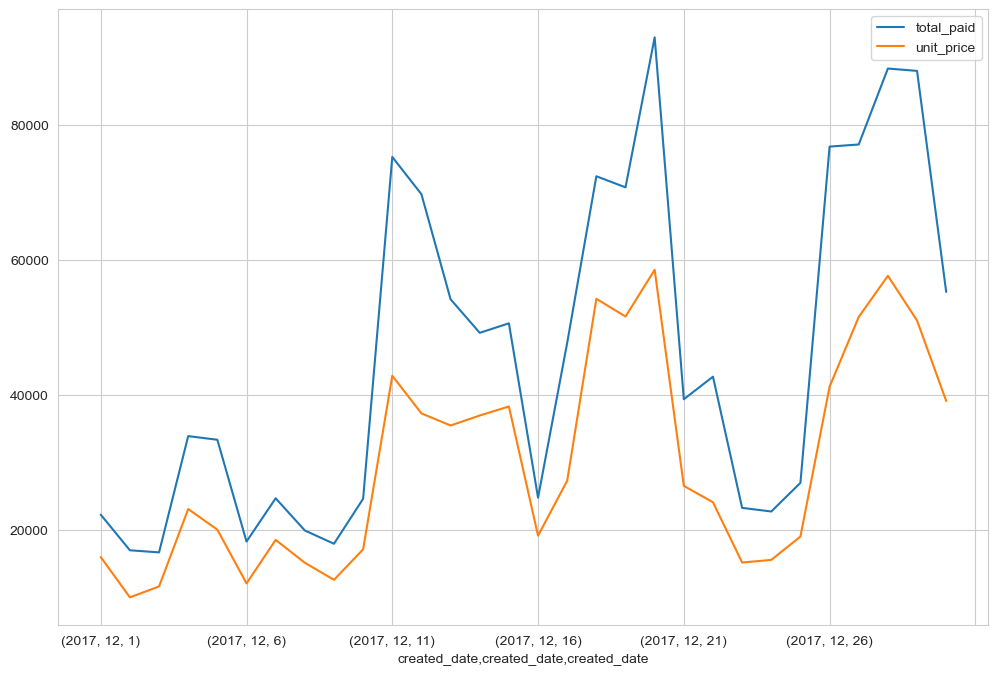

In [257]:
(
    smalldf
    .groupby([smalldf.created_date.dt.year, 
              smalldf.created_date.dt.month,
              smalldf.created_date.dt.day]).agg({"total_paid": "sum", "unit_price": "sum"})
    .plot(figsize=(12, 8))
 );

In [258]:
blackdf = seasondf.loc[seasondf["created_date"].between("2017-11-22", "2017-11-27")]
blackdf.head()

,id_order,created_date,discount,total_paid,unit_price,price,month,day,weekday,day_of_week,month_name,year
28,256679,2017-11-26 10:43:04,4.36,20.58,13.59,17.95,11,26,6,Sunday,November,2017
57,268234,2017-11-24 09:33:02,16.96,84.17,62.99,79.95,11,24,4,Friday,November,2017
58,268234,2017-11-24 09:33:02,3.76,84.17,16.19,19.95,11,24,4,Friday,November,2017
102,292183,2017-11-24 02:05:50,63.50,71.48,66.49,129.99,11,24,4,Friday,November,2017
103,293164,2017-11-23 18:05:25,19.00,54.99,51.00,70.00,11,23,3,Thursday,November,2017


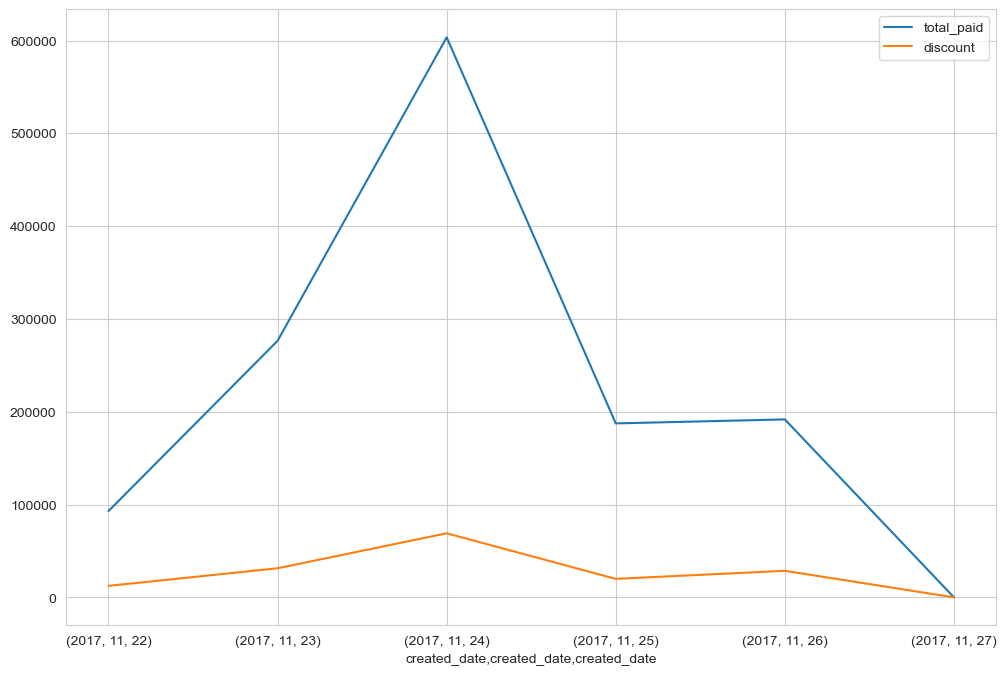

In [259]:
(
    blackdf
    .groupby([blackdf.created_date.dt.year, 
              blackdf.created_date.dt.month,
              blackdf.created_date.dt.day]).agg({"total_paid": "sum", "discount": "sum"})
    .plot(figsize=(12, 8))
 );

In [260]:
combined_df.head(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,price,discount,discount_percent,name,desc,in_stock,type,brand_abb,brand_name
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,60.99,13.5,22.13,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,1,12755395,OWC,OWC


In [261]:
cat_df = combined_df.copy()

In [262]:
cat_df["category"] = ""

In [263]:
cat_df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,price,discount,discount_percent,name,desc,in_stock,type,brand_abb,brand_name,category
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,60.99,13.50,22.13,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,1,12755395,OWC,OWC,
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,22.95,3.96,17.25,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,0,5720,IOT,iOttie,
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,89.00,16.81,18.89,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,1,13005399,APP,Apple,
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,76.99,16.09,20.90,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,0,1298,CRU,Crucial,
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,299.99,157.50,52.50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,0,11905404,PEB,Pebble,


In [264]:
cats_df = order_qp.merge(cat_df,how='left').loc[:,['id_order','created_date','discount','total_paid','unit_price','price', 'category','type','date','discount_percent','product_quantity']]

In [265]:
# Function for type categorization based on dict
def categorize(dict):
    for type_num in dict:
        cats_df.loc[cats_df["type"] == type_num, "category"] += dict[type_num]
    cats_df.loc[cats_df["category"] == "", "category"] += "other"

# Dict with type numbers and category labels    
num_label_dict = {
    "11865403" : "iPhone case",
    "12175397" : "NAS server", # Also hard drives in this category, needs refinement
    "1298" : "open", # What does than mean?
    "11935397" : "hard drive external",
    "11905404" : "unclear", # Not sure what this is
    "1282" : "Mac computer", ####### Check this one as to imac27 and macbook pro
    "12635403" : "iPad case",
    "13835403" : "MacBook case",
    "5,74E+15" : "iMac 27inch",
    "1364" : "Mac memory",
    "12585395" : "USB adapter",
    "1296" : "monitor",
    "1325" : "charging cable",
    "5384" : "headphone",
    "1433" : "SSD expansion",
    "12215397" : "Mac SSD expansion",
    "5398" : "speakers",
    "1,02E+12" : "MacBook Pro", # category occurs twice
    "1,44E+11" : "repair service iPhone iPad",
    "57445397" : "memory card", # also pen drives included
    "1334" : "router",
    "2158" : "MacBook Pro", # category occurs twice
    "2449" : "strap Apple Watch",
    "12655397" : "hard drive internal",
    "1229" : "digital pen pointer",
    "12995397" : "dock hub", # also external hard disks, quite mixed
    "1515" : "external battery",
    "13615399" : "car charger",
    "13555403" : "iPhone screen protector",
    "1405" : "Wacom tablet"
}
      

 

In [266]:
cats_df.head()

,id_order,created_date,discount,total_paid,unit_price,price,category,type,date,discount_percent,product_quantity
0,241423,2017-11-06 13:10:02,10.83,136.15,129.16,139.99,,11935397,2017-11-06 12:47:20,7.74,1
1,242832,2017-12-31 17:40:03,7.22,15.76,10.77,17.99,,11905404,2017-12-31 17:26:40,40.13,1
2,243330,2017-02-16 10:59:38,22.00,84.98,77.99,99.99,,1364,2017-02-15 17:07:44,22.00,1
3,245275,2017-06-28 11:35:37,30.00,149.00,149.00,179.00,,11905404,2017-06-28 11:12:30,16.76,1
4,245595,2017-01-21 12:52:47,50.96,112.97,52.99,103.95,,11935397,2017-01-21 12:49:00,49.02,2


In [267]:
cats_df["total_paid_percent"] = ((cats_df.total_paid/cats_df.price)*100).round(2)
cats_df.head()

,id_order,created_date,discount,total_paid,unit_price,price,category,type,date,discount_percent,product_quantity,total_paid_percent
0,241423,2017-11-06 13:10:02,10.83,136.15,129.16,139.99,,11935397,2017-11-06 12:47:20,7.74,1,97.26
1,242832,2017-12-31 17:40:03,7.22,15.76,10.77,17.99,,11905404,2017-12-31 17:26:40,40.13,1,87.60
2,243330,2017-02-16 10:59:38,22.00,84.98,77.99,99.99,,1364,2017-02-15 17:07:44,22.00,1,84.99
3,245275,2017-06-28 11:35:37,30.00,149.00,149.00,179.00,,11905404,2017-06-28 11:12:30,16.76,1,83.24
4,245595,2017-01-21 12:52:47,50.96,112.97,52.99,103.95,,11935397,2017-01-21 12:49:00,49.02,2,108.68


In [268]:
# Call function (passing in dict)
categorize(num_label_dict)

############################################################

# Function to make plots for each category, showing total revenue (top) 
# and average percentage discount (bottom)

# Create function for making plots by category

def plots(liste):
    for cat in liste:
        
        monthly_df=(
            cats_df.loc[cat_df["category"]==cat, :]
            .resample("MS", on="created_date")["total_paid"]
            .sum()
        ).to_frame()
        
        monthly_df=(
            cats_df.loc[cat_df["category"]==cat, :]
            .resample("MS", on="date")["discount_percent"]
            .mean()
        ).to_frame()
        
        fig, axes = plt.subplots(2, 1)
        sns.lineplot(data=monthly_df, palette=['r'], ax=axes[1]);
        sns.lineplot(data=monthly_df, ax=axes[0]).set(title=cat);
        plt.savefig('plots/'+cat+'.png')
        plt.clf()
        


# create copy of orders
cats_df=cats_df.copy()


# create list of categories:
cat_list =[
    "iPhone case",
    "NAS server",
    "open",
    "hard drive external",
    "unclear",
    "Mac computer",
    "iPad case",
    "MacBook case",
    "iMac 27inch",
    "Mac memory",
    "USB adapter",
    "monitor",
    "charging cable",
    "headphone",
    "SSD expansion",
    "Mac SSD expansion",
    "speakers",
    "MacBook Pro",
    "repair service iPhone iPad",
    "memory card",
    "router",
    "MacBook Pro",
    "strap Apple Watch",
    "hard drive internal",
    "digital pen pointer",
    "dock hub",
    "external battery",
    "car charger",
    "iPhone screen protector",
    "Wacom tablet"]


In [269]:
cats_df.head(1)

,id_order,created_date,discount,total_paid,unit_price,price,category,type,date,discount_percent,product_quantity,total_paid_percent
0,241423,2017-11-06 13:10:02,10.83,136.15,129.16,139.99,hard drive external,11935397,2017-11-06 12:47:20,7.74,1,97.26


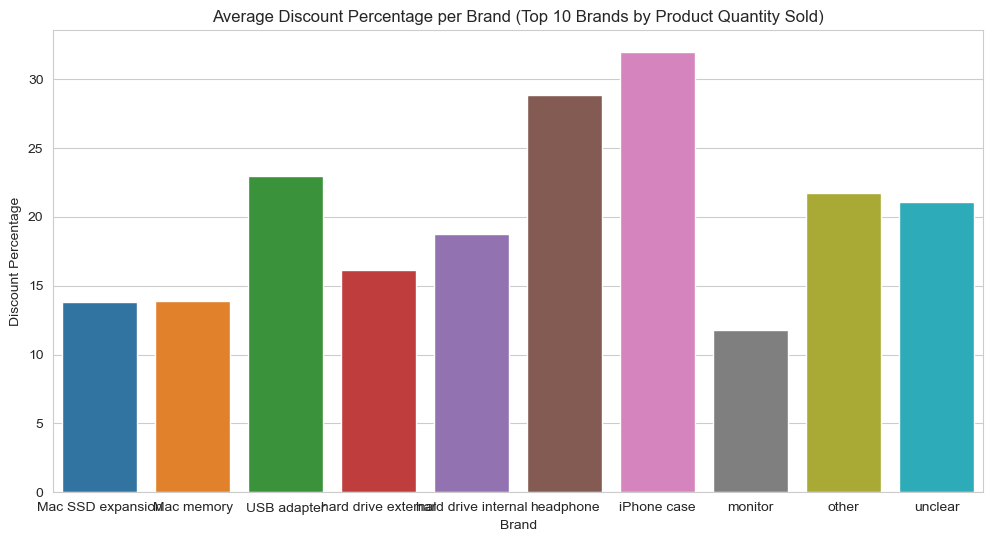

In [270]:
#average discount percentage per Brand
# get top 10 brands by product quantity sold
top_category = cats_df.groupby('category')['product_quantity'].sum().nlargest(10)

# filter data to include only top brands
top_category_df = cats_df[cats_df['category'].isin(top_category.index)]

# calculate discount percentage
top_category_df['discount_percent'] = (top_category_df['discount'] / top_category_df['price']) * 100

# calculate average discount percentage per brand
avg_discount_per_category = top_category_df.groupby('category')['discount_percent'].mean()

# create bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_discount_per_category.index, y=avg_discount_per_category.values)
plt.title("Average Discount Percentage per Brand (Top 10 Brands by Product Quantity Sold)")
plt.xlabel("Brand")
plt.ylabel("Discount Percentage")
plt.show()



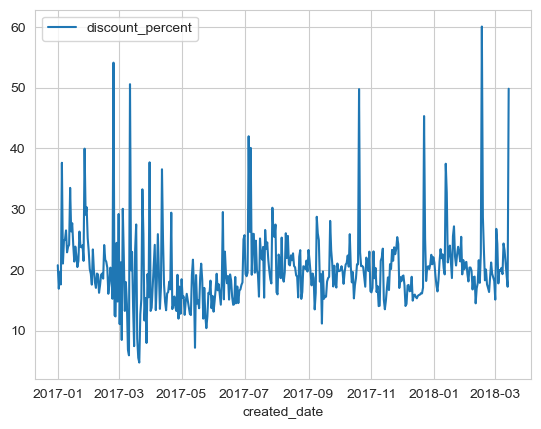

In [271]:
dis_p = cats_df.copy()

mean_daily_perc_disc=(
    dis_p
    .resample("D", on="created_date")["discount_percent"]
    .mean()
 ).to_frame()

sns.lineplot(data=mean_daily_perc_disc);


In [272]:
smalldf = cats_df.loc[cats_df["created_date"].between("2017-12-01", "2017-12-31")]


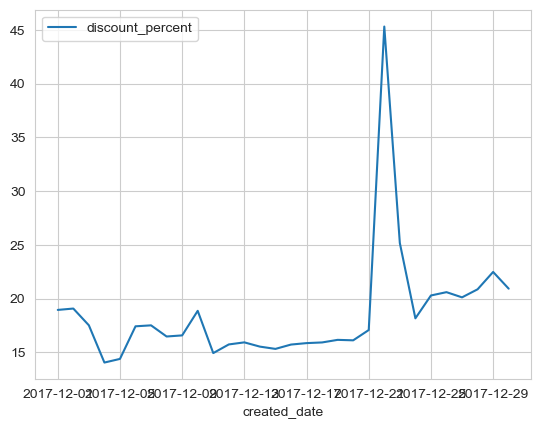

In [273]:
dis_p = smalldf.copy()

mean_daily_perc_disc=(
    dis_p
    .resample("D", on="created_date")["discount_percent"]
    .mean()
 ).to_frame()

sns.lineplot(data=mean_daily_perc_disc);

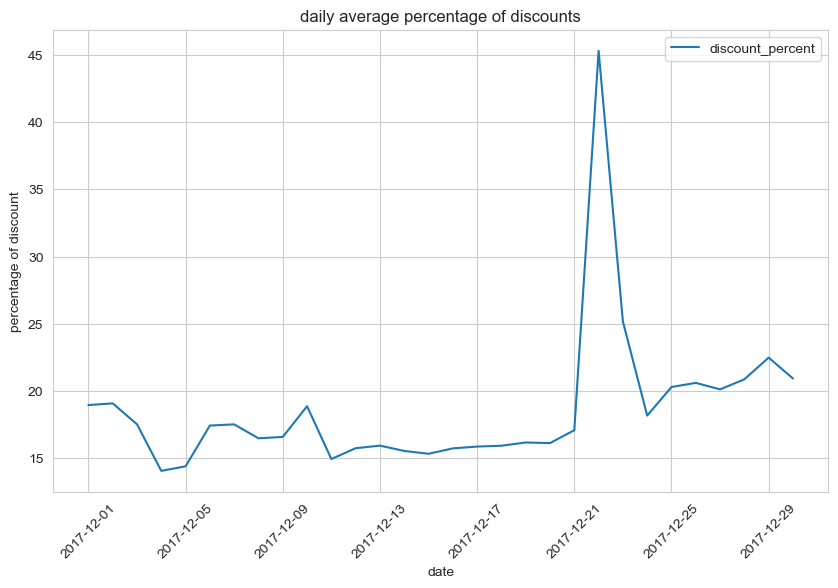

In [274]:


# Calculate mean daily percentage of discounts
mean_daily_perc_disc = (
    dis_p
    .resample("D", on="created_date")["discount_percent"]
    .mean()
 ).to_frame()

# Plot time series of mean daily percentage of discounts and highlight trends
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=mean_daily_perc_disc, ax=ax)
ax.set(title='daily average percentage of discounts', xlabel='date', ylabel='percentage of discount')
ax.tick_params(axis='x', rotation=45)
plt.show()


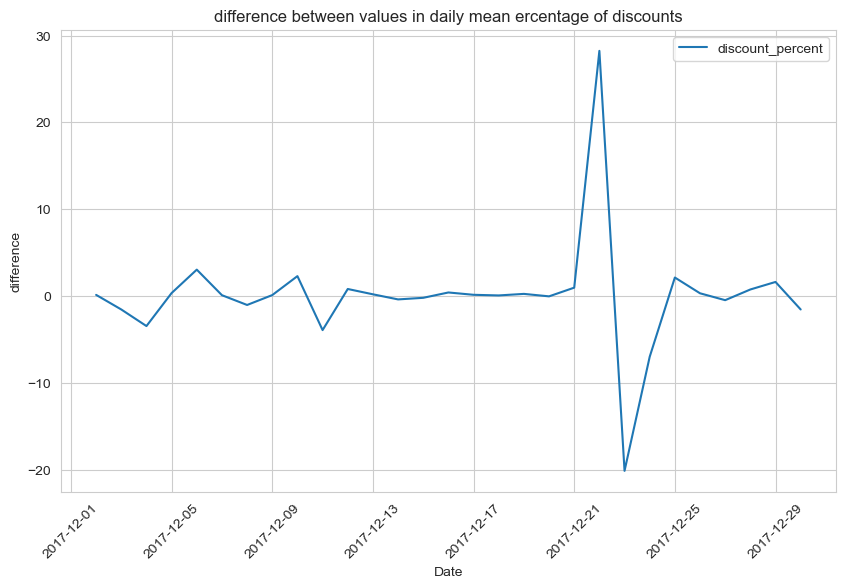

In [275]:


# Calculate mean daily percentage of discounts
mean_daily_perc_disc = (
    dis_p
    .resample("D", on="created_date")["discount_percent"]
    .mean()
 ).to_frame()

# Calculate the difference between values in december
daily_perc_disc_diff = mean_daily_perc_disc.diff()

# plot time series of difference betweenvalues
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=daily_perc_disc_diff, ax=ax)
ax.set(title='difference between values in daily mean ercentage of discounts', xlabel='Date', ylabel='difference')
ax.tick_params(axis='x', rotation=45)
plt.show()


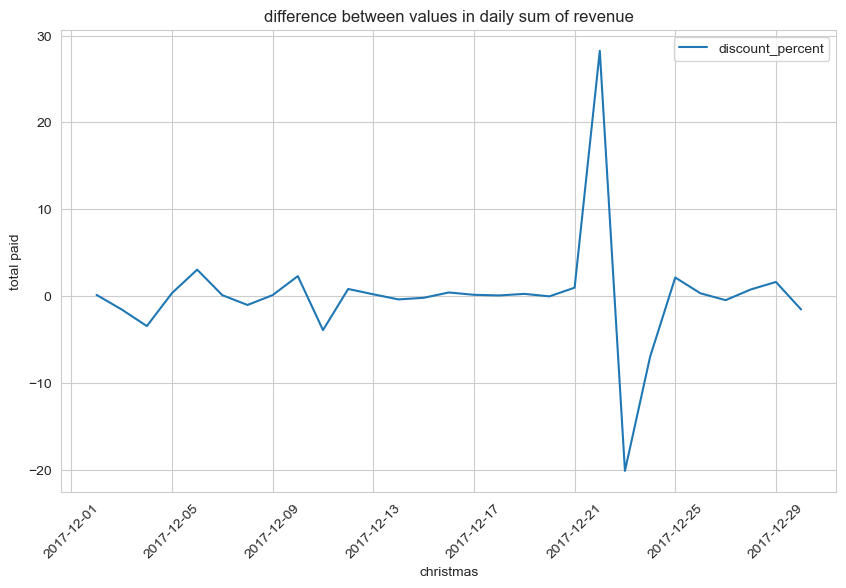

In [276]:


# Calculate daily sum of revenue (total_paid)
sum_daily_revenue = (
    dis_p
    .resample("D", on="created_date")["total_paid"]
    .sum()
 ).to_frame()

# Calculate the difference between values in december
daily_revenue_diff = sum_daily_revenue.diff()

# plot time series of difference between values
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=daily_perc_disc_diff, ax=ax)
ax.set(title='difference between values in daily sum of revenue', xlabel='christmas', ylabel='total paid')
ax.tick_params(axis='x', rotation=45)
plt.show()

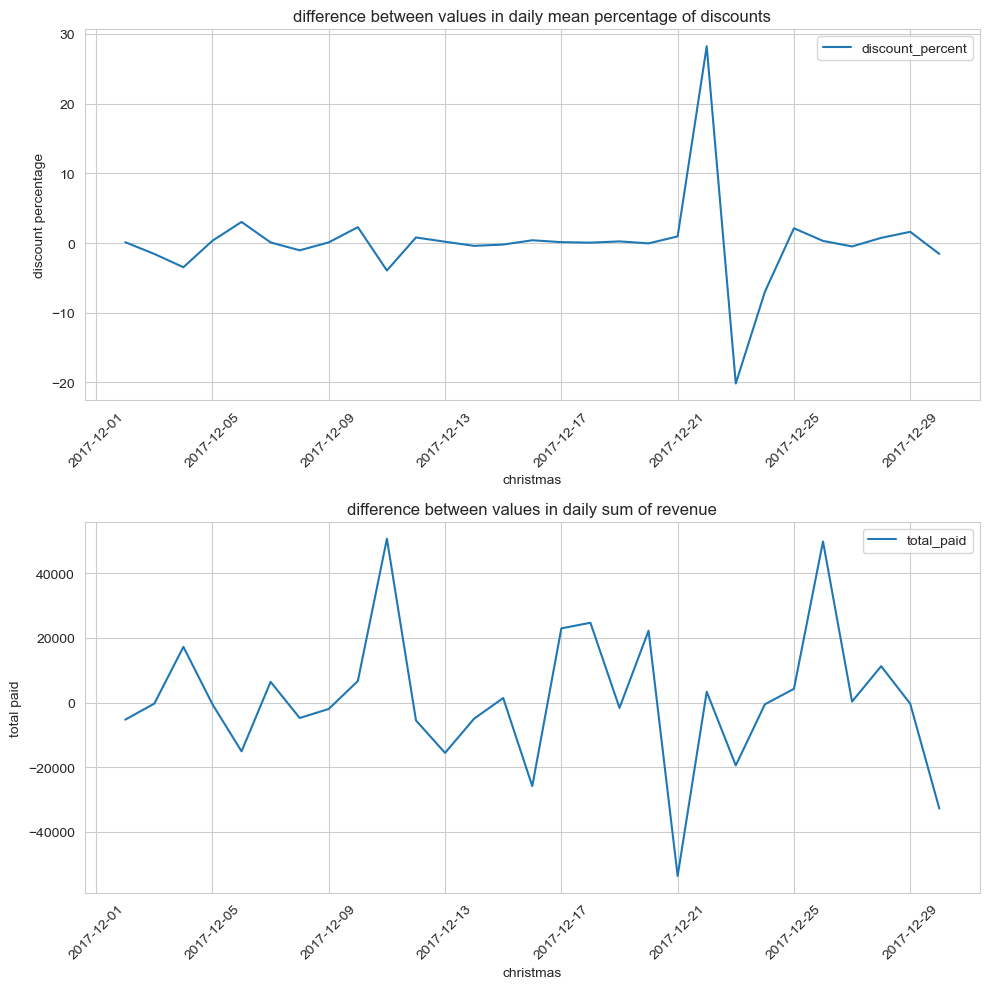

In [277]:
# calculate mean daily percentage of discounts
mean_daily_perc_disc = (
    dis_p
    .resample("D", on="created_date")["discount_percent"]
    .mean()
 ).to_frame()

# calculate the difference between values in december
daily_perc_disc_diff = mean_daily_perc_disc.diff()

# calculate daily sum of revenue (total_paid)
sum_daily_revenue = (
    dis_p
    .resample("D", on="created_date")["total_paid"]
    .sum()
 ).to_frame()

# calculate the difference between values in december
daily_revenue_diff = sum_daily_revenue.diff()

# create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# plot time series of difference between consecutive values in daily mean percentage of discounts
sns.lineplot(data=daily_perc_disc_diff, ax=ax1)
ax1.set(title='difference between values in daily mean percentage of discounts', xlabel='christmas', ylabel='discount percentage')
ax1.tick_params(axis='x', rotation=45)

# plot time series of difference between consecutive values in daily sum of revenue
sns.lineplot(data=daily_revenue_diff, ax=ax2)
ax2.set(title='difference between values in daily sum of revenue', xlabel='christmas', ylabel='total paid')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


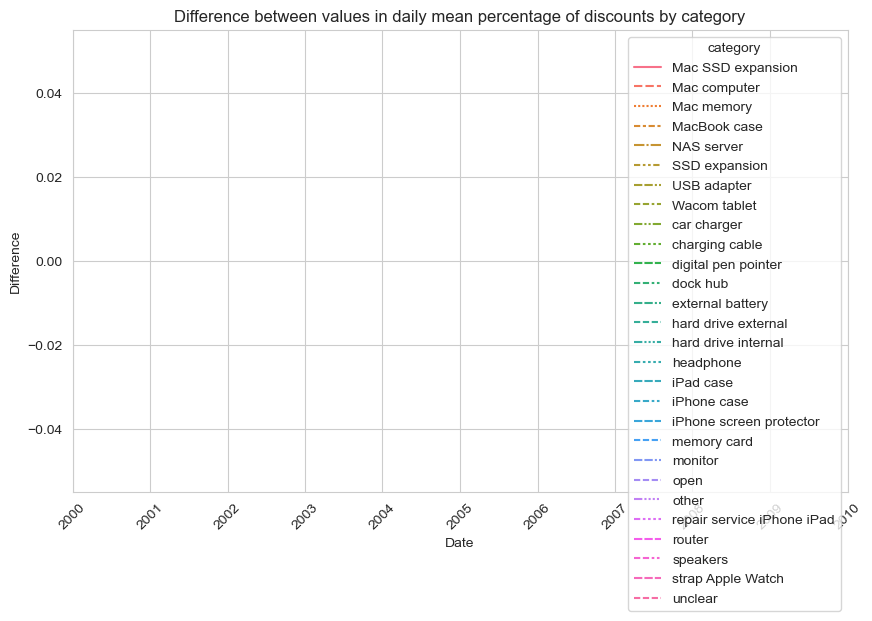

In [300]:
# Group data by category and date and calculate mean daily percentage of discounts for each group
mean_daily_perc_disc_cat = (
    dis_p
    .groupby(['category', pd.Grouper(key='created_date', freq='M')])
    ['discount_percent']
    .mean()
    .reset_index()
)

# Calculate the difference between values in december for each category
daily_perc_disc_diff_cat = (
    mean_daily_perc_disc_cat
    .pivot(index='created_date', columns='category', values='discount_percent')
    .diff()
)

# Plot time series of difference between values for each category
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=daily_perc_disc_diff_cat, ax=ax)
ax.set(title='Difference between values in daily mean percentage of discounts by category',
       xlabel='Date', ylabel='Difference')
ax.tick_params(axis='x', rotation=45)
plt.show()


In [279]:
# Group data by product category and date, and calculate the total paid for each group
cat_date_total = dis_p.groupby(['category', 'created_date'])['total_paid'].sum().reset_index()

# Resample the data to daily frequency and calculate the daily sum of total paid for each category
cat_date_sum = cat_date_total.pivot(index='created_date', columns='category', values='total_paid').resample('D').sum()

# Select the top 10 categories based on the sum of total paid
top_10_cat = cat_date_sum.sum().sort_values(ascending=False)[:5].index.tolist()

# Subset the data to only include rows where the category is in the top 10
top_10_cat_date_total = cat_date_total[cat_date_total['category'].isin(top_10_cat)]

# Resample the data to daily frequency again and calculate the daily sum of total paid for each category
top_10_cat_date_sum = top_10_cat_date_total.pivot(index='created_date', columns='category', values='total_paid').resample('D').sum()


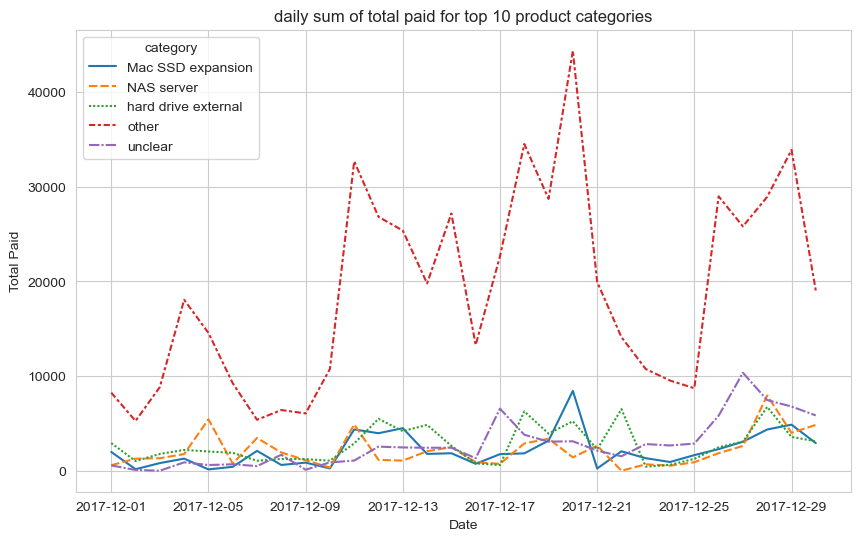

In [280]:


# Create line plot
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.lineplot(data=top_10_cat_date_sum)
plt.title('daily sum of total paid for top 10 product categories')
plt.xlabel('Date')
plt.ylabel('Total Paid')
plt.show()


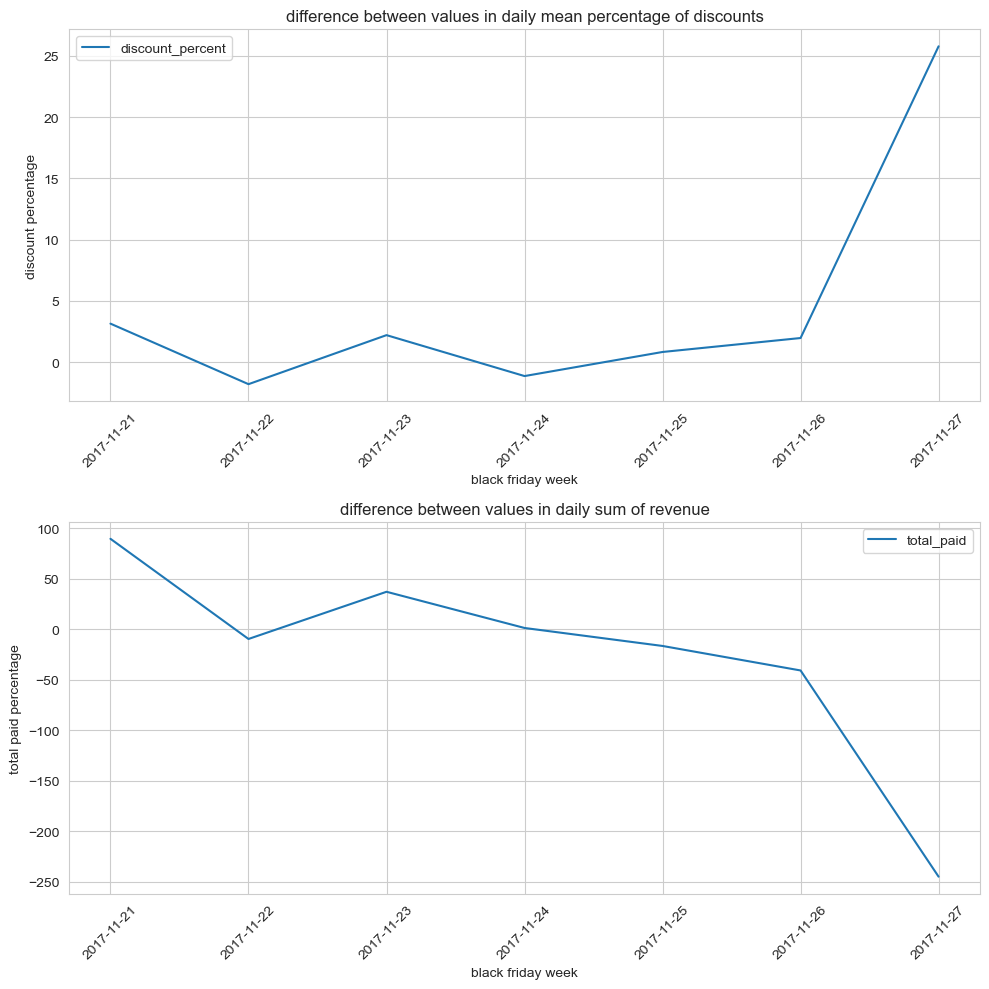

In [281]:
blackdf = cats_df.loc[cats_df["created_date"].between("2017-11-20", "2017-11-27")]
black_p = blackdf.copy()

# calculate mean daily percentage of discounts
mean_daily_perc_disc = (
    black_p
    .resample("D", on="created_date")["discount_percent"]
    .mean()
 ).to_frame()

# calculate the difference between values in december
daily_perc_disc_diff = mean_daily_perc_disc.diff()

# calculate daily sum of revenue (total_paid)
sum_daily_revenue = (
    black_p
    .resample("D", on="created_date")["total_paid"]
    .mean()
 ).to_frame()

# calculate the difference between values in december
daily_revenue_diff = sum_daily_revenue.diff()

# create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# plot time series of difference between consecutive values in daily mean percentage of discounts
sns.lineplot(data=daily_perc_disc_diff, ax=ax1, color = 'green')
ax1.set(title='difference between values in daily mean percentage of discounts', xlabel='black friday week', ylabel='discount percentage')
ax1.tick_params(axis='x', rotation=45)

# plot time series of difference between consecutive values in daily sum of revenue
sns.lineplot(data=daily_revenue_diff, ax=ax2)
ax2.set(title='difference between values in daily sum of revenue', xlabel='black friday week', ylabel='total paid percentage')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


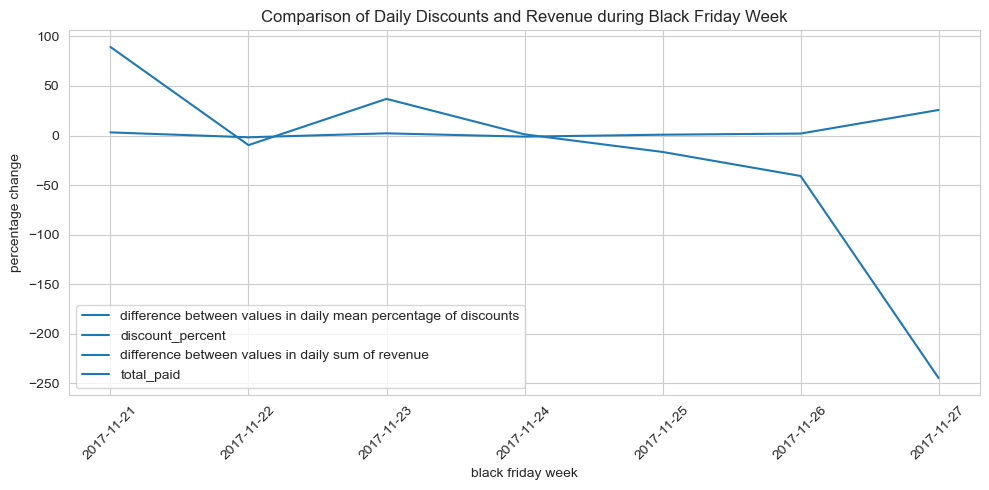

In [282]:
blackdf = cats_df.loc[cats_df["created_date"].between("2017-11-20", "2017-11-27")]
black_p = blackdf.copy()

# calculate mean daily percentage of discounts
mean_daily_perc_disc = (
    black_p
    .resample("D", on="created_date")["discount_percent"]
    .mean()
 ).to_frame()

# calculate the difference between values in december
daily_perc_disc_diff = mean_daily_perc_disc.diff()

# calculate daily sum of revenue (total_paid)
sum_daily_revenue = (
    black_p
    .resample("D", on="created_date")["total_paid"]
    .mean()
 ).to_frame()

# calculate the difference between values in december
daily_revenue_diff = sum_daily_revenue.diff()

# create subplot
fig, ax = plt.subplots(figsize=(10, 5))

# plot time series of difference between consecutive values in daily mean percentage of discounts
sns.lineplot(data=daily_perc_disc_diff, ax=ax, label='difference between values in daily mean percentage of discounts')

# plot time series of difference between consecutive values in daily sum of revenue
sns.lineplot(data=daily_revenue_diff, ax=ax, label='difference between values in daily sum of revenue')

ax.set(title='Comparison of Daily Discounts and Revenue during Black Friday Week', xlabel='black friday week', ylabel='percentage change')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


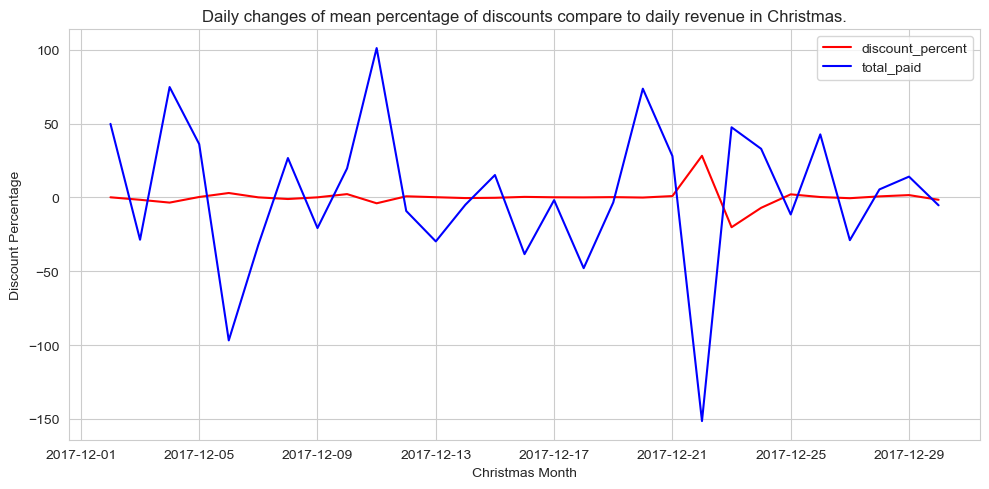

In [298]:
# calculate mean daily percentage of discounts
mean_daily_perc_disc = (
    dis_p
    .resample("D", on="created_date")["discount_percent"]
    .mean()
 ).to_frame()

# calculate the difference between values in december
daily_perc_disc_diff = mean_daily_perc_disc.diff()

# calculate daily mean of revenue (total_paid)
sum_daily_revenue = (
    dis_p
    .resample("D", on="created_date")["total_paid"]
    .mean()
 ).to_frame()

# calculate the difference between values in december
daily_revenue_diff = sum_daily_revenue.diff()

# create subplots
fig, ax = plt.subplots(figsize=(10, 5))

# plot difference between values in daily mean percentage of discounts
sns.lineplot(data=daily_perc_disc_diff, ax=ax,palette=['r'])
ax1.set(title='difference between values in daily mean percentage of discounts', xlabel='christmas', ylabel='discount percentage')
ax1.tick_params(axis='x', rotation=45)

# plot difference between values in daily mean of revenue
sns.lineplot(data=daily_revenue_diff, ax=ax,palette=['b'])
ax2.set(title='difference between values in daily sum of revenue', xlabel='christmas', ylabel='total paid percentage')
ax2.tick_params(axis='x', rotation=45)


plt.title('Daily changes of mean percentage of discounts compare to daily revenue in Christmas.')
plt.xlabel('Christmas Month')
plt.ylabel('Discount Percentage')
plt.tight_layout()
plt.show()



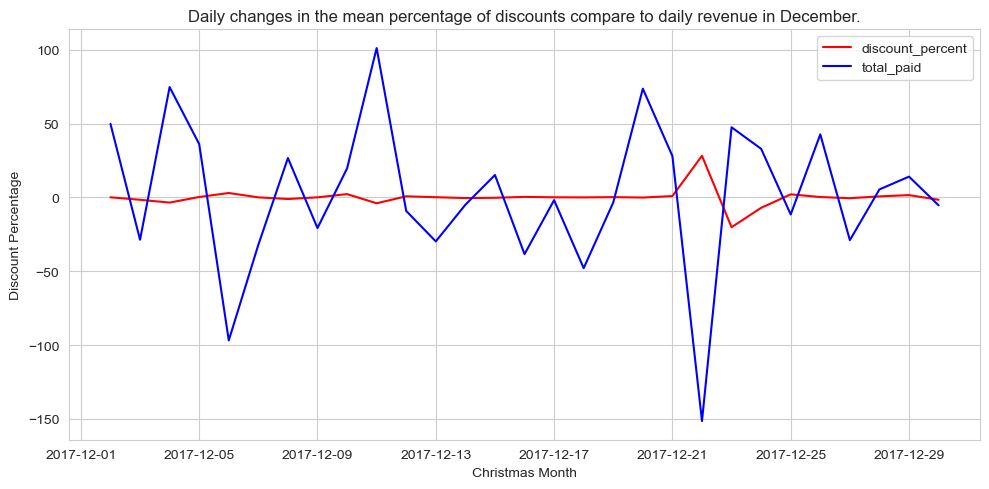

In [305]:
# calculate mean daily percentage of discounts
mean_daily_perc_disc = (
    dis_p
    .resample("D", on="created_date")["discount_percent"]
    .mean()
 ).to_frame()

# calculate the difference between values in december
daily_perc_disc_diff = mean_daily_perc_disc.diff()

# calculate daily mean of revenue (total_paid)
sum_daily_revenue = (
    dis_p
    .resample("D", on="created_date")["total_paid"]
    .mean()
 ).to_frame()

# calculate the difference between values in december
daily_revenue_diff = sum_daily_revenue.diff()

# create subplots
fig, ax = plt.subplots(figsize=(10, 5))

# plot difference between values in daily mean percentage of discounts
sns.lineplot(data=daily_perc_disc_diff, ax=ax,palette=['r'])
ax1.set(title='difference between values in daily mean percentage of discounts', xlabel='christmas', ylabel='discount percentage')
ax1.tick_params(axis='x', rotation=45)

# plot difference between values in daily mean of revenue
sns.lineplot(data=daily_revenue_diff, ax=ax,palette=['b'])
ax2.set(title='difference between values in daily sum of revenue', xlabel='christmas', ylabel='total paid percentage')
ax2.tick_params(axis='x', rotation=45)


plt.title('Daily changes in the mean percentage of discounts compare to daily revenue in December.')
plt.xlabel('Christmas Month')
plt.ylabel('Discount Percentage')
plt.tight_layout()
plt.show()



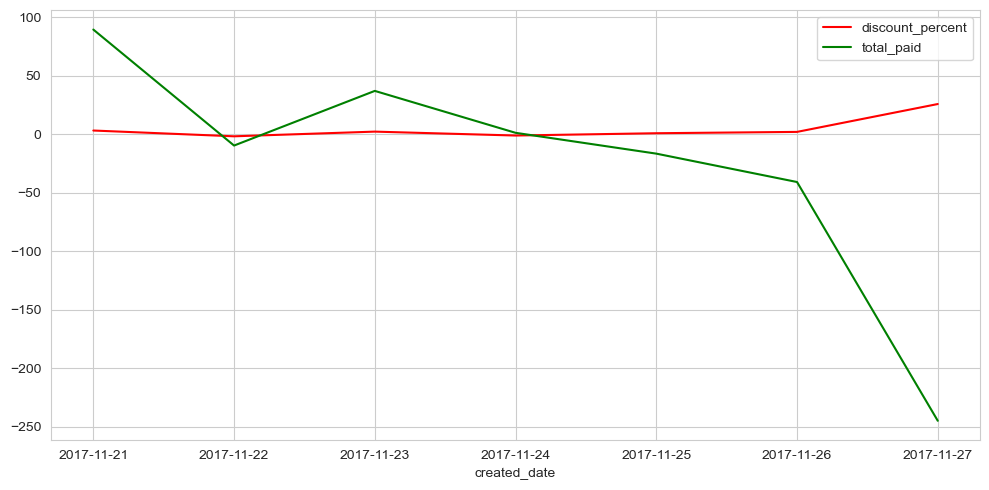

In [284]:
# calculate mean daily percentage of discounts
mean_daily_perc_disc = (
    black_p
    .resample("D", on="created_date")["discount_percent"]
    .mean()
 ).to_frame()

# calculate the difference between values in december
daily_perc_disc_diff = mean_daily_perc_disc.diff()

# calculate daily sum of revenue (total_paid)
sum_daily_revenue = (
    black_p
    .resample("D", on="created_date")["total_paid"]
    .mean()
 ).to_frame()

# calculate the difference between values in december
daily_revenue_diff = sum_daily_revenue.diff()

# create subplots
fig, ax = plt.subplots(figsize=(10, 5))

# plot time series of difference between consecutive values in daily mean percentage of discounts
sns.lineplot(data=daily_perc_disc_diff, ax=ax,palette=['r'])
ax1.set(title='difference between values in daily mean percentage of discounts', xlabel='black friday', ylabel='discount percentage')
ax1.tick_params(axis='x', rotation=45)

# plot time series of difference between consecutive values in daily sum of revenue
sns.lineplot(data=daily_revenue_diff, ax=ax,palette=['g'])
ax2.set(title='difference between values in daily sum of revenue', xlabel='black friday', ylabel='total paid percentage')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

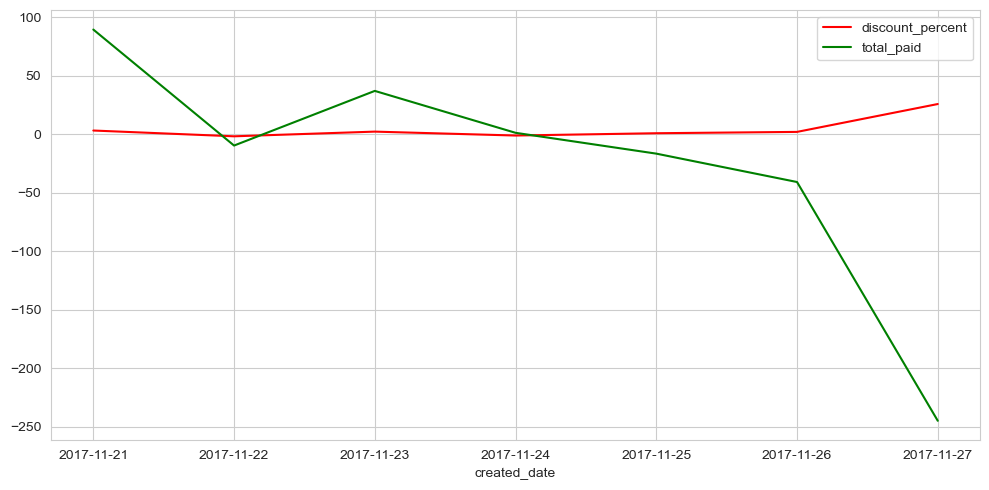

In [285]:
# calculate mean daily percentage of discounts
mean_daily_perc_disc = (
    black_p
    .resample("D", on="created_date")["discount_percent"]
    .mean()
 ).to_frame()

# calculate the difference between values in december
daily_perc_disc_diff = mean_daily_perc_disc.diff()

# calculate daily sum of revenue (total_paid)
sum_daily_revenue = (
    black_p
    .resample("D", on="created_date")["total_paid"]
    .mean()
 ).to_frame()

# calculate the difference between values in december
daily_revenue_diff = sum_daily_revenue.diff()

# create subplots
fig, ax = plt.subplots(figsize=(10, 5))

# plot time series of difference between consecutive values in daily mean percentage of discounts
sns.lineplot(data=daily_perc_disc_diff, ax=ax,palette=['r'])
ax1.set(title='difference between values in daily mean percentage of discounts', xlabel='black friday', ylabel='discount percentage')
ax1.tick_params(axis='x', rotation=45)

# plot time series of difference between consecutive values in daily sum of revenue
sns.lineplot(data=daily_revenue_diff, ax=ax,palette=['g'])
ax2.set(title='difference between values in daily sum of revenue', xlabel='black friday', ylabel='total paid percentage')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

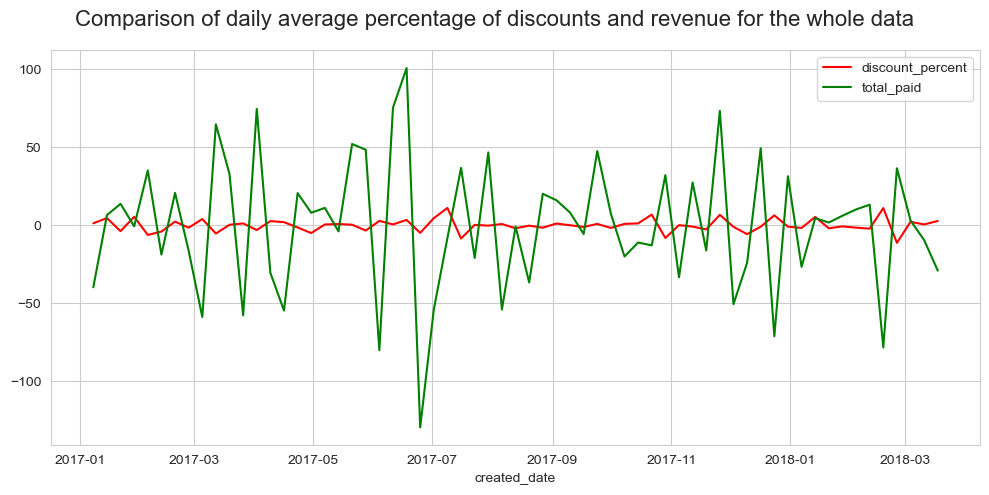

In [304]:
# calculate mean daily percentage of discounts for the whole data
mean_daily_perc_disc = (
    cats_df
    .resample("W", on="created_date")["discount_percent"]
    .mean()
 ).to_frame()

# calculate the difference between values during the whole time period
daily_perc_disc_diff = mean_daily_perc_disc.diff()

# calculate daily mean of revenue (total_paid)
mean_daily_revenue = (
    cats_df
    .resample("W", on="created_date")["total_paid"]
    .mean()
 ).to_frame()

# calculate the difference between values in the whole year
daily_revenue_diff = mean_daily_revenue.diff()

# create subplots
fig, ax = plt.subplots(figsize=(10, 5))

# plot time series of difference between consecutive values in daily mean percentage of discounts
sns.lineplot(data=daily_perc_disc_diff, ax=ax,palette=['r'])
ax1.set(title='difference between values in daily mean percentage of discounts', xlabel='black friday', ylabel='discount percentage')
ax1.tick_params(axis='x', rotation=45)

# plot time series of difference between consecutive values in daily sum of revenue
sns.lineplot(data=daily_revenue_diff, ax=ax,palette=['g'])
ax2.set(title='difference between values in daily sum of revenue', xlabel='black friday', ylabel='total paid percentage')
ax2.tick_params(axis='x', rotation=45)

fig.suptitle('Comparison of daily average percentage of discounts and revenue for the whole data', fontsize=16)
plt.tight_layout()
plt.show()


In [287]:
blackdf_w = cats_df.loc[cats_df["created_date"].between("2017-10-01", "2017-11-30")]
black_2 = blackdf_w.copy()

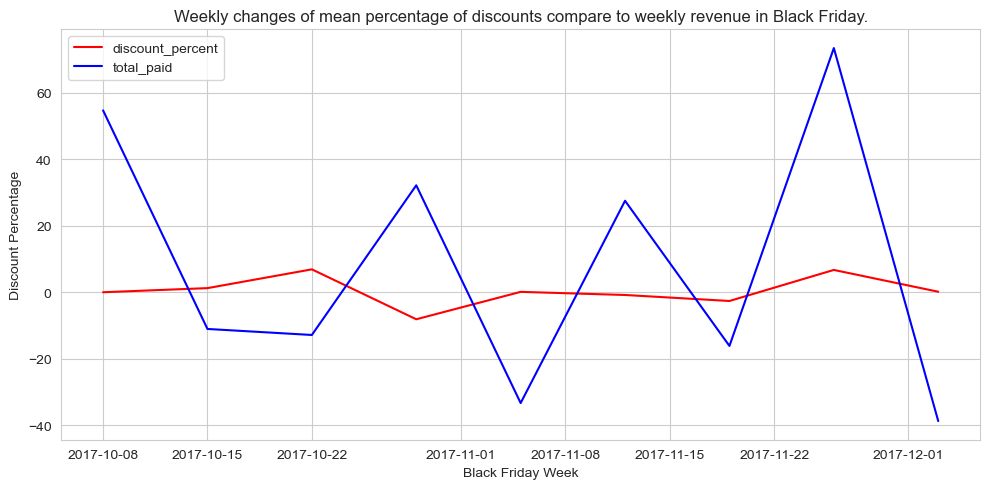

In [296]:
mean_daily_perc_disc = (
    black_2
    .resample("W", on="created_date")["discount_percent"]
    .mean()
 ).to_frame()

# calculate the difference between values in december
daily_perc_disc_diff = mean_daily_perc_disc.diff()

# calculate daily sum of revenue (total_paid)
sum_daily_revenue = (
    black_2
    .resample("W", on="created_date")["total_paid"]
    .mean()
 ).to_frame()

# calculate the difference between values in december
daily_revenue_diff = sum_daily_revenue.diff()

# create subplots
fig, ax = plt.subplots(figsize=(10, 5))

# plot time series of difference between consecutive values in daily mean percentage of discounts
sns.lineplot(data=daily_perc_disc_diff, ax=ax,palette=['r'])
ax1.set(title='difference between values in weekly mean percentage of discounts', xlabel='black friday', ylabel='discount percentage')
ax1.tick_params(axis='x', rotation=45)

# plot time series of difference between consecutive values in daily sum of revenue
sns.lineplot(data=daily_revenue_diff, ax=ax,palette=['b'])
ax2.set(title='difference between values in weekly mean of revenue', xlabel='black friday', ylabel='total paid percentage')
ax2.tick_params(axis='x', rotation=45)


plt.title('Weekly changes of mean percentage of discounts compare to weekly revenue in Black Friday.')
plt.xlabel('Black Friday Week')
plt.ylabel('Discount Percentage')
plt.tight_layout()
plt.show()